In [1]:
#!pip install sentinelhub

This notebook show how to use the odc_sh engine in order to load the Sentinel data using SentinelHUB.

In [1]:
import os 
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime
from sentinelhub import DataCollection
import pandas

%matplotlib inline

from odc_sh import engine


sh_client_id=""
sh_client_secret=""

if not sh_client_id:
    sh_client_id = %env SH_CLIENT_ID

if not sh_client_secret:
    sh_client_secret = %env  SH_CLIENT_SECRET


In [2]:
dc = engine.Datacube(sh_client_id=sh_client_id, sh_client_secret=sh_client_secret)

In [21]:
products = dc.list_sh_products()
#products

In [22]:
col = DataCollection.DEM_COPERNICUS_30
col.bands

(Band(name='DEM', units=(<Unit.METERS: 'METERS'>,), output_types=(<class 'numpy.float32'>,)),)

Load Sentinel 1 IW data. Additional filter with polarization needs to be specified. You can also limit the data by orbit.

In [23]:
resolution = 100  # in meters
longitude = (11.987527, 13.004914)
latitude = (41.990797, 44.018348)

time = ("2019-01-01", "2019-01-04")

ds = dc.load(
    product=DataCollection.DEM_COPERNICUS_30,
    latitude=latitude,
    longitude=longitude,
    time=time,
    sh_resolution=resolution,
  #  sh_filter={"swath_mode": "IW", "orbit_direction": "DESCENDING"},
)

Searching for new products
measurement: {'name': 'DEM', 'units': 'METERS', 'dtype': 'float32', 'nodata': 0}
Can not load collection details for {collection.api_id}
Product created for DEM_COPERNICUS_30
11.987527,41.990797,13.004914,44.018348
LOADING SENTINEL HUB DATA
---------------------------------------------
longitude: 11.987527, 13.004914; latitude: 41.990797, 44.018348; resolution: 100 m; crs: EPSG:4326; time: 2022-12-14 
request:
request:


  0%|          | 0/2 [00:00<?, ?it/s]

Display properties of the x-array datacube

Store downloaded data to .nc format

In [8]:
#ds.to_netcdf("s2_all_bands.nc")

<xarray.DataArray (time: 1, y: 31, x: 13)>
array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  1.1956643 ,  2.2263098 ,
          2.5114512 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,
          1.0514189 ,  1.687964  ,  2.305964  ,  2.1070418 ,
          2.7990599 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.14014468,  1.9113873 ,  2.0432925 ,  1.873215  ,
          1.5344038 ,  2.3083293 ,  2.5967734 ,  3.1259818 ,
          3.156352  ],
...
        [10.572563  , 11.137179  , 11.817095  , 12.769664  ,
         13.034027  , 13.652792  , 14.219947  , 14.354352  ,
         14.308044  , 14.605464  , 15.454889  , 15.996737  ,
         16.668663  ],
        [11.426862  , 12.190741  , 12.768867  , 13.999716  ,
         14.409174  , 15.247609  , 15.741698  , 16.005033  ,
         15.93986   , 15.76079   , 16.779955  , 18.276703  ,
         18.98466   ],
        [11.933082  , 12.49305   , 13.532011  , 14.4220085 ,
         15.139134  , 15.891638  , 16.442581  , 16.801746  ,
         16.890797  , 16.334375  , 17.526009  , 19.295887  ,
         20.357206  ],
        [12.653382  , 13.45653   , 14.056511  , 15.159708  ,
         16.044685  , 16.587002  , 17.540619  , 18.566216  ,
         18.208801  , 18.134401  , 19.866268  , 20.852     ,
         22.59983   ],
        [13.455702  , 13.832577  , 14.300203  , 15.247715  ,
         16.489159  , 17.081894  , 18.213589  , 19.113361  ,
         19.375277  , 19.008099  , 20.67936   , 21.72651   ,
         24.22753   ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2022-12-14T08:02:22.962713
  * x        (x) float32 11.99 11.99 11.99 11.99 11.99 ... 12.0 12.0 12.0 12.0
  * y        (y) float32 41.99 41.99 41.99 41.99 ... 42.01 42.02 42.02 42.02
Attributes:
    description:  Sentinel HUB export: None
    bands:        ['DEM']

You can load the data 

In [ ]:
#ds_stored = xr.open_dataset("s2_all_bands.nc")
#ds_stored

Dislay available time intervals

In [24]:
for t in ds.time:
    print(f"times: {t.data}")

times: 2022-12-14T08:15:13.656147000


Get first available frame

In [25]:
single_time_frame = ds.sel(time=ds.time[0])
single_time_frame

<xarray.DataArray (y: 2228, x: 896)>
array([[  0.     ,   0.     ,   0.     , ..., 408.35266, 388.6182 ,
        394.20276],
       [  0.     ,   0.     ,   0.     , ..., 424.35046, 380.3847 ,
        371.41272],
       [  0.     ,   0.     ,   0.     , ..., 430.76794, 417.73114,
        395.51746],
       ...,
       [528.6152 , 537.474  , 545.947  , ...,   0.     ,   0.     ,
          0.     ],
       [457.93304, 476.35242, 489.61456, ...,   0.     ,   0.     ,
          0.     ],
       [423.98035, 446.1963 , 462.55072, ...,   0.     ,   0.     ,
          0.     ]], dtype=float32)
Coordinates:
    time     datetime64[ns] 2022-12-14T08:15:13.656147
  * x        (x) float32 11.99 11.99 11.99 11.99 11.99 ... 13.0 13.0 13.0 13.0
  * y        (y) float32 41.99 41.99 41.99 41.99 ... 44.01 44.02 44.02 44.02
Attributes:
    description:  Sentinel HUB export: None
    bands:        ['DEM']

time: 2022-12-14T08:15:13.656147000


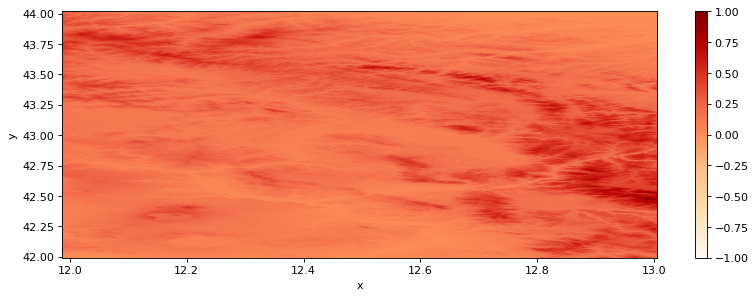

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4), dpi=80)

for idx, t in enumerate(ds.time):
    print(f"time: {t.data}")
    single_time_frame = ds.sel(time=ds.time[idx], drop=True)
    single_time_frame= single_time_frame / single_time_frame.data.max()
    imgplot = single_time_frame.plot.imshow(ax=ax, x="x", y="y")
    imgplot.set_cmap('OrRd')
plt.show()